<a href="https://colab.research.google.com/github/mhelynne/bank-project-am/blob/master/PARTE_2_Projeto_de_Aprendizagem_de_M%C3%A1quina_Maria_e_Ana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto da disciplina Aprendizagem de Máquina
Professores: Evandro Costa e Xu Yang

Alunas: Ana Correia e Helynne Lima

O banco de dados escolhido para trabalhar neste projeto foi o Bank Marketing Data Set, disponível [aqui](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing).

In [1]:
import pandas as pd

url = 'https://github.com/mhelynne/bank-project-am/blob/master/bank/bank-num.csv?raw=true'
data = pd.read_csv(url, sep=",", index_col=0)

data.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,58,3,0,2143,1,0,5,5,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,44,2,0,29,1,0,5,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0
2,33,2,0,2,1,1,5,5,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,47,0,0,1506,1,0,5,5,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,33,0,0,1,0,0,5,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0


#Imports e configurações iniciais

In [2]:
import math
import numpy as np
from time import time
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate

import warnings
warnings.filterwarnings("ignore")


target = data.pop('y')
cv = 10

scoring = ['accuracy', 'f1_weighted']

#Função de treinamento e teste

In [3]:
def train_test(model, data= data, target= target, cv= cv):

  train_log = ""
  t0 = time()

  scores = cross_validate(model, data, target, cv= cv,
                          scoring=scoring, return_train_score=False)
  
  train_log  += "Tempo gasto: " + str(round(time()-t0, 3)) + "s\n"

  fit_time = np.mean(scores['fit_time'])
  train_log  += "\nTempo médio de treinamento: " + str(round(fit_time, 3))

  score_time = np.mean(scores['score_time'])
  train_log  += "\nTempo médio de teste: " + str(round(score_time, 3))

  total_time = fit_time + score_time
  train_log  += "\nTempo total médio: " + str(round(total_time, 3))

  test_accuracy = np.mean(scores['test_accuracy'])
  train_log  += "\nAcurácia média: " + str(round(test_accuracy, 3))

  test_f1_weighted = np.mean(scores['test_f1_weighted'])
  train_log  += "\nF1-score médio de teste: " + str(round(test_f1_weighted, 3))
  
  return train_log

#KNN

k = raiz quadrada de n

In [4]:
n = data.shape[0]
sqrt_n = math.sqrt(n)
neigh = KNeighborsClassifier(n_neighbors= int(sqrt_n))
log = train_test(neigh)
print(log)

Tempo gasto: 12.498s

Tempo médio de treinamento: 0.267
Tempo médio de teste: 0.981
Tempo total médio: 1.248
Acurácia média: 0.884
F1-score médio de teste: 0.847


k = 10

In [5]:
neigh10 = KNeighborsClassifier(n_neighbors= 10)

log = train_test(neigh10)
print(log)

Tempo gasto: 6.09s

Tempo médio de treinamento: 0.267
Tempo médio de teste: 0.341
Tempo total médio: 0.607
Acurácia média: 0.88
F1-score médio de teste: 0.855


#Randon Forest

In [6]:
rdnf = RandomForestClassifier(criterion='entropy', max_depth= 5,
                              random_state=42)

log = train_test(rdnf)
print(log)

Tempo gasto: 21.869s

Tempo médio de treinamento: 2.146
Tempo médio de teste: 0.039
Tempo total médio: 2.185
Acurácia média: 0.883
F1-score médio de teste: 0.842


#Naive Bayes

In [7]:
gnb = GaussianNB()

log = train_test(gnb)
print(log)

Tempo gasto: 0.479s

Tempo médio de treinamento: 0.04
Tempo médio de teste: 0.006
Tempo total médio: 0.046
Acurácia média: 0.785
F1-score médio de teste: 0.802


#Multi-layer Perceptron 

In [8]:
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(3, ), random_state=1)

log = train_test(mlp)
print(log)

Tempo gasto: 5.389s

Tempo médio de treinamento: 0.529
Tempo médio de teste: 0.007
Tempo total médio: 0.537
Acurácia média: 0.388
F1-score médio de teste: 0.344


**Ajuste de parâmetros da Rede Neural**

In [9]:
'''
mlp_aj = MLPClassifier(max_iter=100)

#definição do espaço de hiperparâmetros
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# A execucao desse bloco de codigo pode demorar.

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp_aj, parameter_space, n_jobs=-1, cv=cv)
clf.fit(data, target)

# Best paramete set
print('Best parameters found:\n', clf.best_params_)
'''

"\nmlp_aj = MLPClassifier(max_iter=100)\n\n#definição do espaço de hiperparâmetros\nparameter_space = {\n    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],\n    'activation': ['tanh', 'relu'],\n    'solver': ['sgd', 'adam', 'lbfgs'],\n    'alpha': [0.0001, 0.05],\n    'learning_rate': ['constant','adaptive'],\n}\n\n# A execucao desse bloco de codigo pode demorar.\n\nfrom sklearn.model_selection import GridSearchCV\n\nclf = GridSearchCV(mlp_aj, parameter_space, n_jobs=-1, cv=cv)\nclf.fit(data, target)\n\n# Best paramete set\nprint('Best parameters found:\n', clf.best_params_)\n"

O resultado do GridSearchCV foi:

```
Best parameters found:
{'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
```



Aplicando os parâmetros encontrados:

In [10]:
mlp = MLPClassifier(activation='relu', alpha=0.05,
                    hidden_layer_sizes=(50, 100, 50), 
                    learning_rate='adaptive',
                    solver='sgd', random_state=42)

log = train_test(mlp)
print(log)

Tempo gasto: 803.407s

Tempo médio de treinamento: 80.32
Tempo médio de teste: 0.019
Tempo total médio: 80.338
Acurácia média: 0.882
F1-score médio de teste: 0.85


#SVM

In [11]:
svm = SVC(max_iter=10000, C= 1, gamma= 0.0001, kernel= 'rbf')
log = train_test(svm)
print(log)

Tempo gasto: 561.982s

Tempo médio de treinamento: 52.447
Tempo médio de teste: 3.749
Tempo total médio: 56.196
Acurácia média: 0.88
F1-score médio de teste: 0.855


Com dados padronizados:

In [12]:
svm = SVC(max_iter=10000, C= 1, gamma= 0.0001, kernel= 'rbf')

ss = StandardScaler()
data_std = pd.DataFrame(ss.fit_transform(data), columns = data.columns)

log = train_test(svm, data_std)
print(log)

Tempo gasto: 435.138s

Tempo médio de treinamento: 40.575
Tempo médio de teste: 2.937
Tempo total médio: 43.512
Acurácia média: 0.893
F1-score médio de teste: 0.86


#Comparação dos algoritmos

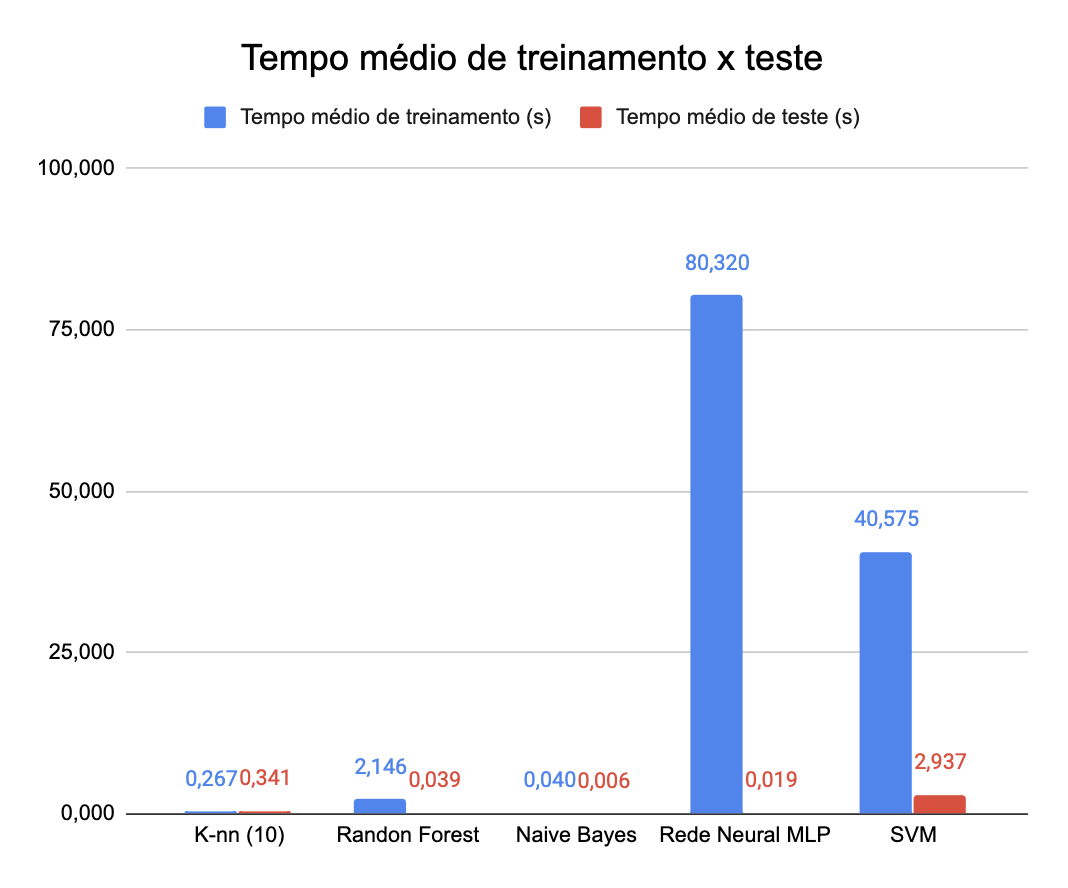

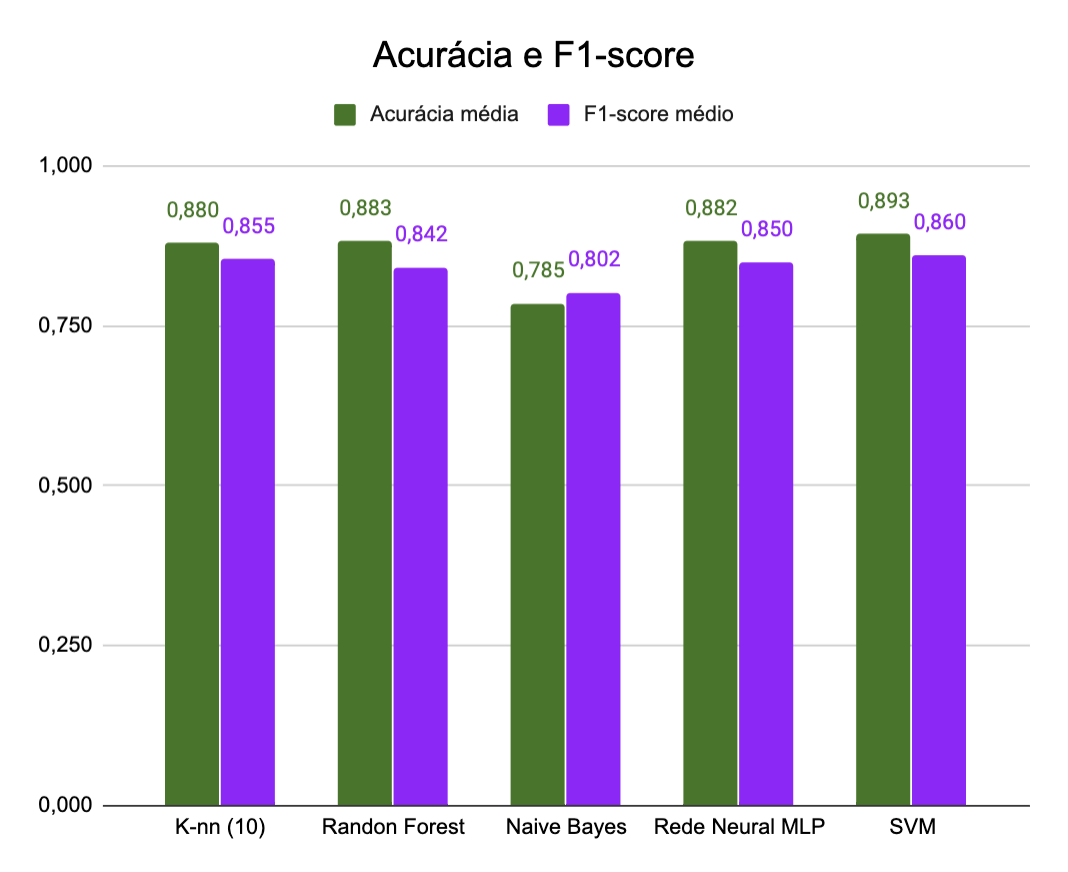